In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
filename = '../../results/pairwise_distance/within_strain_pairwise_distance_aa.csv'
within_strain_distance = pd.read_csv(filename, index_col = 0)
within_strain_distance['similar'] = within_strain_distance['distance']<=0.05 #95% similarly

In [33]:
similarity = np.linspace(0, 1, 200)
num_strains_similar_opa = []
for i in similarity:
    thresh = 1-i #95% similarly
    num_strains_similar_opa.append(len(np.unique(within_strain_distance[within_strain_distance['distance']<=thresh]['strain_A'])))

metadata = pd.read_csv('../../results/opa_metadata_locus.csv', index_col = 0)
all_strains = np.unique(metadata['strain'])
num_strains = len(num_strains)
frac_strains_similar_opa = np.array(num_strains_similar_opa)/num_strains

print('percent of strains with pair of opa genes with at least 95% similarity: ', 100*frac_strains_similar_opa[np.where(similarity>0.95)[0][0]])
print('number of strains with pair of opa genes with at least 95% similarity: ', np.array(num_strains_similar_opa)[np.where(similarity>0.95)[0][0]])
print('total number of strains: ', num_strains)

TypeError: object of type 'int' has no len()

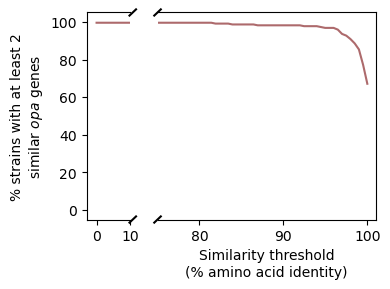

In [34]:
# plt.figure(figsize = (4,3))
fig, (ax, ax2) = plt.subplots(1, 2, sharey = True, width_ratios = [1, 5], figsize = (4,3))

ax.plot(similarity*100, frac_strains_similar_opa*100, color = '#ad6a6c')
ax2.plot(similarity*100, frac_strains_similar_opa*100, color = '#ad6a6c')

ax.set_xlim(-3, 10)
ax2.set_xlim(75, 101)

# ax.spines['right'].set_visible(False)
# ax2.spines['left'].set_visible(False)
# # ax.xaxis.tick_left()
# # ax.tick_params(labelleft='off')  # don't put tick labels at the top
# ax2.xaxis.tick_left()

ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.tick_params(left = False)

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d, 1+d+0.12), (-d, +d), **kwargs)
ax.plot((1-d, 1+d+0.12), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the right axes
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((-d, +d), (-d, +d), **kwargs)

ax2.set_xlabel('Similarity threshold\n(% amino acid identity)')
ax.set_ylabel('% strains with at least 2\nsimilar $opa$ genes')
ax.set_ylim([-5, 105])
plt.tight_layout()
plt.savefig("../../figures/diversity/within_strain_similar_opa_aa_num_strains.png", dpi = 300)
plt.savefig("../../figures/diversity/within_strain_similar_opa_aa_num_strains.pdf")
plt.show()

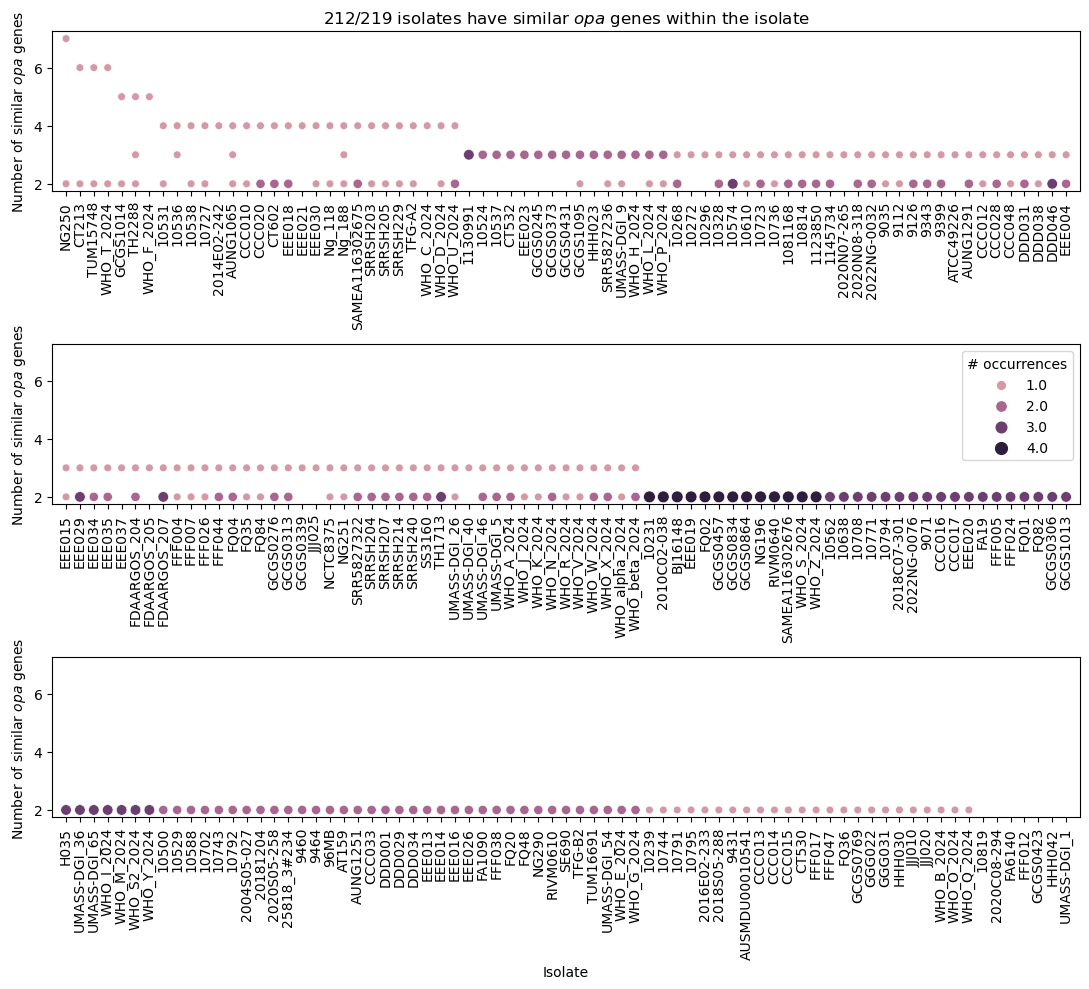

In [46]:
similar_opas = pd.read_csv('../../results/pairwise_distance/within_strain_similar_opa_aa.csv')
# Get the number of occurrences of a certain number of similar opa genes for a given strain
strains = []
num_similar = []
num_occurrences = []
for values, df in similar_opas.groupby(['strain', 'num_similar']):
    strains.append(values[0])
    num_similar.append(values[1])
    num_occurrences.append(len(df))
similar_opas_counts = pd.DataFrame({'strain':strains, 'num_similar':num_similar, 'num_occurrences':num_occurrences})

# Add strains that had no similar opa genes
strains_with_similar_opa = np.unique(similar_opas['strain'])
strains_without_similar_opa = np.setdiff1d(all_strains, strains_with_similar_opa)
strains_without_similar_opa_df = pd.DataFrame({'strain':strains_without_similar_opa, 'num_similar':[0]*len(strains_without_similar_opa), 'num_occurrences':[np.nan]*len(strains_without_similar_opa)})

similar_opas_counts=pd.concat([similar_opas_counts, strains_without_similar_opa_df])
similar_opas_counts.sort_values(by = ['num_similar', 'num_occurrences'], ascending = False, inplace = True)
similar_opas_counts.reset_index(inplace = True, drop = True)

# Split into three rows
strain_order = similar_opas_counts['strain'][sorted(np.unique(similar_opas_counts['strain'], return_index = True)[1])]

first = strain_order[0:int(len(strain_order)/3)].values
second = strain_order[int(len(strain_order)/3):int(2*len(strain_order)/3)].values
third = strain_order[int(2*len(strain_order)/3):].values
similar_opas_counts_first = similar_opas_counts[similar_opas_counts['strain'].isin(first)]
similar_opas_counts_second = similar_opas_counts[similar_opas_counts['strain'].isin(second)]
similar_opas_counts_third = similar_opas_counts[similar_opas_counts['strain'].isin(third)]

similar_opas_counts_first.reset_index(inplace = True, drop = True)
similar_opas_counts_second.reset_index(inplace = True, drop = True)
similar_opas_counts_third.reset_index(inplace = True, drop = True)

### PLOT RESULTS 

fig, ax = plt.subplots(3, 1, sharey = True, figsize = (11,10))
sns.scatterplot(ax = ax[0], data=similar_opas_counts_first, x='strain', y='num_similar', size='num_occurrences', hue = 'num_occurrences', hue_norm = (0, 4), size_norm = (0,4))
sns.scatterplot(ax = ax[1], data=similar_opas_counts_second, x='strain', y='num_similar', size='num_occurrences', hue = 'num_occurrences', hue_norm = (0, 4), size_norm = (0,4))
sns.scatterplot(ax = ax[2], data=similar_opas_counts_third, x='strain', y='num_similar', size='num_occurrences', hue = 'num_occurrences', hue_norm = (0, 4), size_norm = (0,4))

ax[0].tick_params(axis='x', labelrotation=90)
ax[1].tick_params(axis='x', labelrotation=90)
ax[2].tick_params(axis='x', labelrotation=90)
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('Isolate')
ax[0].set_ylabel('Number of similar $opa$ genes')
ax[1].set_ylabel('Number of similar $opa$ genes')
ax[2].set_ylabel('Number of similar $opa$ genes')
ax[0].set_title(str(len(strains_with_similar_opa)) + '/' + str(len(all_strains)) + ' isolates have similar $opa$ genes within the isolate')

legend = ax[0].legend()
legend.remove()
legend = ax[2].legend()
legend.remove()
ax[1].legend(title = '# occurrences', loc = 'upper right')
ax[0].set_xlim([-1, len(first)])
ax[1].set_xlim([-1, len(second)])
ax[2].set_xlim([-1, len(third)])

plt.tight_layout()
plt.savefig("../../figures/diversity/within_strain_similar_opa_aa.png", dpi = 300)
plt.savefig("../../figures/diversity/within_strain_similar_opa_aa.pdf")
plt.show()